In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dep = pd.read_csv(
    "./deportistas_1.csv", delimiter = ';')

In [7]:
dep.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
dep.shape

(271116, 15)

In [9]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [10]:
dep.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Text(0.5, 1.0, 'Número de participantes por estación')

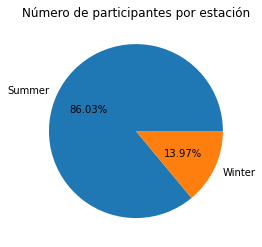

In [448]:
#Participaciones por Estación
fig, ax = plt.subplots()
dep.groupby(['Season']).nunique()['ID'].plot(kind = 'pie', ax = ax, autopct= '%.2f%%')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Número de participantes por estación')

In [454]:
dep.groupby(['Season']).nunique()['Sport']

Season
Summer    52
Winter    17
Name: Sport, dtype: int64

Text(0.5, 1.0, 'Número de participantes por año y género')

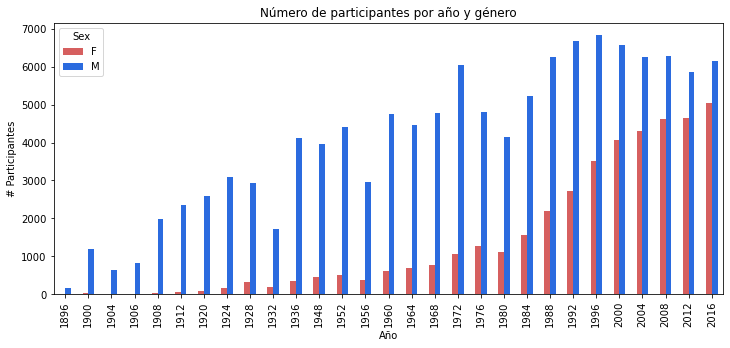

In [456]:
#Número de participantes por año juegos de verano
season = ['Summer']
fig, ax = plt.subplots()
dep[dep.Season.isin(season)].groupby(['Year','Sex']).nunique()['ID'].unstack().plot(kind = 'bar', color=['#d65f5f','#2b6bdf'], figsize = (12,5),ax = ax)
ax.set_xlabel('Año')
ax.set_ylabel('# Participantes')
ax.set_title('Número de participantes por año y género')

Text(0.5, 1.0, 'Número de deportes por año')

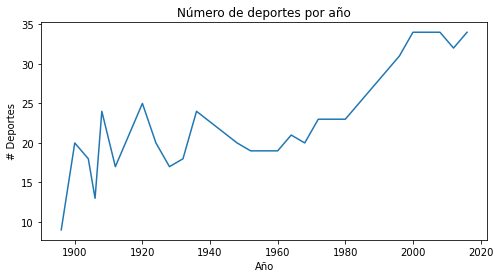

In [100]:
#Número de deportes por año
fig, ax = plt.subplots()
dep[dep.Season.isin(season)].groupby('Year').nunique()['Sport'].plot(kind = 'line', figsize = (8,4), ax = ax)
ax.set_xlabel('Año')
ax.set_ylabel('# Deportes')
ax.set_title('Número de deportes por año')

In [409]:
#Participaciones del 2016
años = [2016]
dep_ver = dep[dep.Season.isin(season)]
dep_años = dep_ver[dep_ver.Year.isin(años)]
dep_medal = dep_años[dep_años.Medal.notnull()]
pais = ['USA']
dep_USA = dep_medal[dep_medal.NOC.isin(pais)]
dep_USA_Bronce = dep_USA[dep_USA.Medal=='Bronze']
dep_USA_Bronce.groupby(['NOC']).nunique()['Event']
dep_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269511,134857,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold
270111,135132,Bojana ivkovi,F,28.0,186.0,72.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver
270281,135205,Shakhobiddin Shokirovich Zoirov,M,23.0,169.0,52.0,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,Gold
270370,135245,Milenko Zori,M,27.0,179.0,73.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver


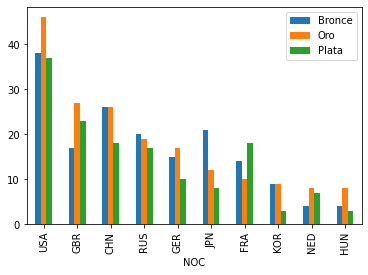

In [429]:
#Top 10 países con más medallas Río 2016
fig, ax = plt.subplots()
dep_medal.groupby(['NOC','Medal']).nunique()['Event'].unstack().sort_values(by = 'Gold', ascending = False).head(10).plot(kind = 'bar', ax = ax)
ax.legend(['Bronce','Oro','Plata'])

In [15]:
#top 10 
dep_top10 = dep_años.groupby(['NOC'])nunique().sort_values(ascending=False).head(10) 
dep_top10.shape
dep_top10

NOC
USA    1165
GER     682
RUS     643
AUS     549
CHN     537
FRA     379
GBR     358
ITA     351
JPN     335
ESP     310
Name: ID, dtype: int64

In [295]:
#Análisis Ecuador
paises = ['Ecuador']
dep_Ecu = dep[dep.Team.isin(paises)]
dep_Ecu

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1277,717,Leopoldo Acosta,M,22.0,185.0,61.0,Ecuador,ECU,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 800 metres,NaN
5179,2943,Miguel ngel Almachi Condo,M,27.0,165.0,55.0,Ecuador,ECU,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Marathon,NaN
5180,2943,Miguel ngel Almachi Condo,M,31.0,165.0,55.0,Ecuador,ECU,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
6531,3657,Rafael Domingo Anchundia Delgado,M,22.0,160.0,54.0,Ecuador,ECU,1968 Summer,1968,Summer,Mexico City,Boxing,Boxing Men's Bantamweight,NaN
8157,4501,Lissette Alexandra Antes Castillo,F,21.0,177.0,58.0,Ecuador,ECU,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Women's Lightweight, Freestyle",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251412,125909,Rolando Patricio Vera Rodas,M,31.0,155.0,47.0,Ecuador,ECU,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Marathon,NaN
252831,126591,Belisario Villacs,M,NaN,NaN,NaN,Ecuador,ECU,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Marathon,NaN
252872,126614,Claudio Villanueva Flores,M,28.0,175.0,68.0,Ecuador,ECU,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,NaN
259419,129885,Nicols Lionel Wettstein Deyme,M,35.0,171.0,71.0,Ecuador,ECU,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN


In [299]:
dep_Ecu.describe()

,ID,Age,Height,Weight,Year
count,277.000000,272.000000,259.000000,257.000000,277.000000
mean,66599.862816,25.011029,171.142857,67.073930,1994.440433
std,37213.254644,6.108782,9.211072,15.087971,18.597010
min,717.000000,15.000000,145.000000,43.000000,1924.000000
25%,27299.000000,20.000000,165.000000,59.000000,1980.000000
50%,74165.000000,24.000000,170.000000,64.000000,1996.000000
75%,97932.000000,28.000000,178.000000,74.000000,2012.000000
max,133580.000000,51.000000,193.000000,155.000000,2016.000000


In [27]:
dep_Ecu.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1277,717,Leopoldo Acosta,M,22.0,185.0,61.0,Ecuador,ECU,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 800 metres,NaN
5179,2943,Miguel ngel Almachi Condo,M,27.0,165.0,55.0,Ecuador,ECU,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Marathon,NaN
5180,2943,Miguel ngel Almachi Condo,M,31.0,165.0,55.0,Ecuador,ECU,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
6531,3657,Rafael Domingo Anchundia Delgado,M,22.0,160.0,54.0,Ecuador,ECU,1968 Summer,1968,Summer,Mexico City,Boxing,Boxing Men's Bantamweight,NaN
8157,4501,Lissette Alexandra Antes Castillo,F,21.0,177.0,58.0,Ecuador,ECU,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Women's Lightweight, Freestyle",NaN


In [457]:
dep_Ecu.groupby(['Sex']).nunique()['ID']

Sex
F     41
M    117
Name: ID, dtype: int64

Text(0.5, 1.0, 'Participación por deporte')

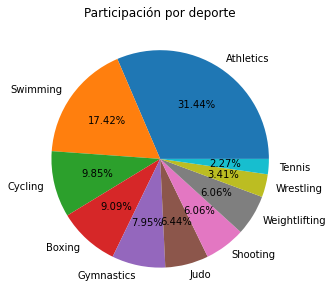

In [463]:
#Participación por deporte
fig, ax = plt.subplots()
dep_Ecu['Sport'].value_counts().head(10).plot(kind = 'pie', figsize = (5,5), ax = ax, autopct= '%.2f%%')
ax.set_ylabel('')
ax.set_title('Participación por deporte')

Text(0.5, 1.0, 'Paticipantes por edición y género')

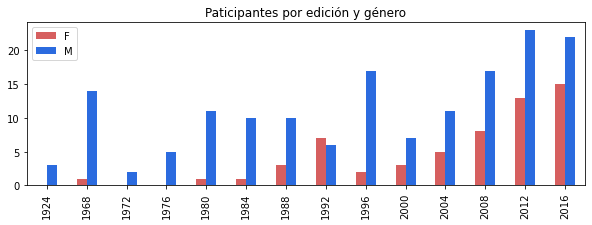

In [460]:
#Paticipación x edición y género
fig, ax = plt.subplots()
dep_Ecu.groupby(['Year', 'Sex']).nunique()["ID"].unstack().plot(kind='bar', ax = ax, color=['#d65f5f','#2b6bdf'], figsize = (10,3))
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend(['F','M'])
ax.set_title('Paticipantes por edición y género')

In [30]:
dep_Ecu.describe()

,ID,Age,Height,Weight,Year
count,277.000000,272.000000,259.000000,257.000000,277.000000
mean,66599.862816,25.011029,171.142857,67.073930,1994.440433
std,37213.254644,6.108782,9.211072,15.087971,18.597010
min,717.000000,15.000000,145.000000,43.000000,1924.000000
25%,27299.000000,20.000000,165.000000,59.000000,1980.000000
50%,74165.000000,24.000000,170.000000,64.000000,1996.000000
75%,97932.000000,28.000000,178.000000,74.000000,2012.000000
max,133580.000000,51.000000,193.000000,155.000000,2016.000000


Text(0.5, 1.0, 'Mediana de Edad por año y género')

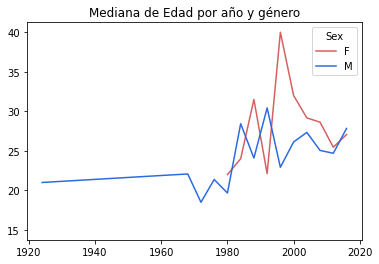

In [329]:
#Mediana de Edad por año y género
fig, ax = plt.subplots()
dep_Ecu.groupby(['Year', 'Sex']).mean()["Age"].unstack().plot(kind = 'line', ax = ax, color=['#d65f5f','#2b6bdf'])
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Mediana de Edad por año y género')

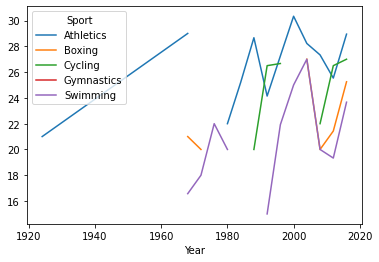

In [391]:
#Mediana de edad por deporte y año
dep_Edad = dep_Ecu['Sport'].value_counts().head(5)
dep1 = dep_Ecu[dep_Ecu.Sport.isin(dep_Edad.index)]
dep1.groupby(['Year','Sport']).mean()["Age"].unstack().plot()

In [39]:
dep_Ecu[dep_Ecu.Medal.notnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
185631,93329,Jefferson Leonardo Prez Quezada,M,22.0,167.0,60.0,Ecuador,ECU,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 20 kilometres Walk,Gold
185635,93329,Jefferson Leonardo Prez Quezada,M,34.0,167.0,60.0,Ecuador,ECU,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 20 kilometres Walk,Silver


Text(0.5, 1.0, 'Deportes y Deportistas por edición')

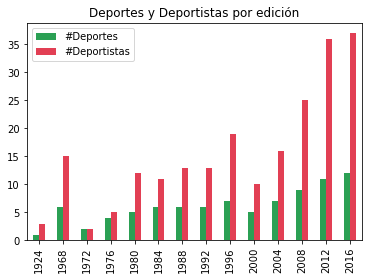

In [408]:
#Deportes y #Deportistas por edicion
fig, ax = plt.subplots()
dep_Ecu.groupby('Year').nunique()[['Sport', 'Name']].plot(kind = 'bar', color=['#2ba054','#e23f54'], ax = ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend(['#Deportes','#Deportistas'])
ax.set_title('Deportes y Deportistas por edición')

In [470]:
dep_Ecu.groupby(['Year']).nunique()[['Sport', 'ID']]

,Sport,ID
Year,,
1924,1,3
1968,6,15
1972,2,2
1976,4,5
1980,5,12
1984,6,11
1988,6,13
1992,6,13
1996,7,19


Text(0.5, 1.0, 'Medallas por año')

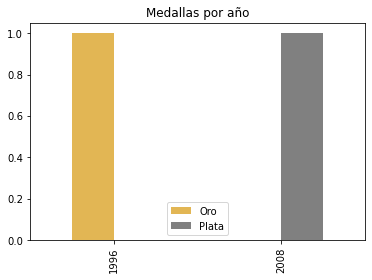

In [420]:
#Número de medallas
fig, ax = plt.subplots()
dep_Ecu[dep_Ecu.Medal.notnull()].groupby(['Year','Medal']).nunique()['Event'].unstack().plot(kind = 'bar', ax = ax, color=['#e2b654','grey'])
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend(['Oro','Plata'])
ax.set_title('Medallas por Año')

In [471]:
dep_Ecu[dep_Ecu.Medal.notnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
185631,93329,Jefferson Leonardo Prez Quezada,M,22.0,167.0,60.0,Ecuador,ECU,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 20 kilometres Walk,Gold
185635,93329,Jefferson Leonardo Prez Quezada,M,34.0,167.0,60.0,Ecuador,ECU,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 20 kilometres Walk,Silver


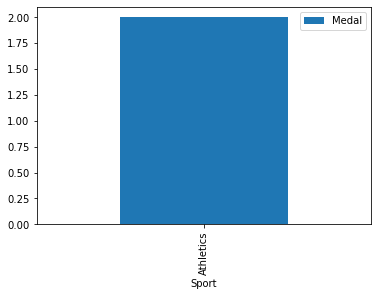

In [422]:
dep_Ecu[dep_Ecu.Medal.notnull()].groupby('Sport').nunique()[['Medal']].plot(kind = 'bar')

Text(0.5, 1.0, 'Participantes por deporte y género')

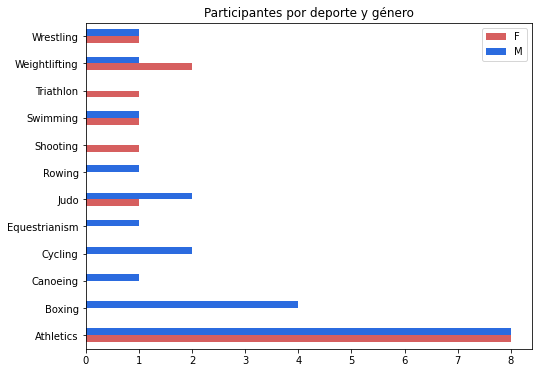

In [473]:
#Participantes por deporte y género Río 2016
fig, ax = plt.subplots()
años = [2016]
dep_2016 = dep_Ecu[dep_Ecu.Year.isin(años)]
dep_2016.groupby(['Sport','Sex']).nunique()['Name'].unstack().plot(kind = 'barh', ax = ax, color=['#d65f5f','#2b6bdf'], figsize=(8,6))
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend(['F','M'])
ax.set_title('Participantes por deporte y género')

In [475]:
dep_2016.groupby(['Sport','Sex']).nunique()['ID']

Sport          Sex
Athletics      F      8
               M      8
Boxing         M      4
Canoeing       M      1
Cycling        M      2
Equestrianism  M      1
Judo           F      1
               M      2
Rowing         M      1
Shooting       F      1
Swimming       F      1
               M      1
Triathlon      F      1
Weightlifting  F      2
               M      1
Wrestling      F      1
               M      1
Name: ID, dtype: int64